### Score: `[97.5]`

Q1. `[4+11+9]` Good job! 注意一下变量信息即可

Q2. `[10]` Good job!

Q3. `[3+5+5+5.5+5 +5.5+5+5.5+5+4]` Good job! 有一些小问题详见注释

Q4. `[5+5+5]` Good job!

各题批注用`### Note`给出，请自行查阅。

# 1. Significant earthquakes since 2150 B.C.
1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.


In [255]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

#1.1 top 20 countries along with the total number of deaths
earthquake = pd.read_csv("Sig_Eqs.tsv",delimiter='\t')
earthquake.groupby(['Country']).sum()['Deaths'].sort_values(ascending=False).head(20)


### Note: 变量应选择Total_Deaths
'''
从数据界面可以看到数据标签的详细注释
Deaths: Whenever possible, numbers of deaths are listed.
Total Deaths: Whenever possible, total number of deaths from the earthquake and secondary effects are listed.
'''

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64

Text(0.5, 1.0, 'The total number of earthquakes with magnitude larger than 3.0 worldwide each year')

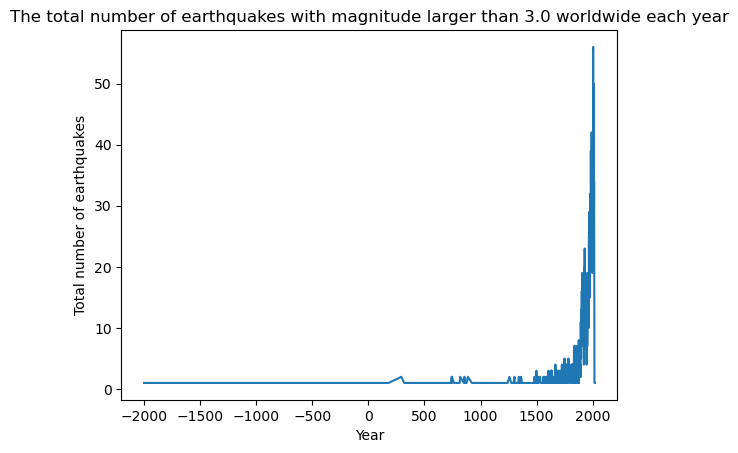

In [42]:
#1.2
count=earthquake[(earthquake['Ms']>3.0)].groupby(['Year']).count()['Id']
count.plot()
plt.xlabel("Year")
plt.ylabel("Total number of earthquakes")
plt.title("The total number of earthquakes with magnitude larger than 3.0 worldwide each year")

trend:total number of earthquakes is increasing especially in recent 500 years, may be due to more sensitive and comprehensive seismic detection techniques to record the earthquakes happended

In [396]:
#1.3
def CountEq_LargestEq(country):
#total number
    total=earthquake.groupby(['Country']).sum()['Deaths'].get(country, 0)
#largest earthquake
    Ms_max=earthquake.groupby(['Country'])['Ms'].max().get(country, None)
#select the information
    if Ms_max is not None:
        max_info = earthquake[(earthquake['Country'] == country) & (earthquake['Ms'] == Ms_max)]
#deal with the missing information
        if not max_info.empty:
            max_information = (max_info['Year'].iloc[0], max_info['Mo'].iloc[0], 
                               max_info['Dy'].iloc[0], max_info['Location Name'].iloc[0])
        else:
            max_information = (None, None, None, None)
    else:
        max_information = (None, None, None, None) 
    return total,max_information
#apply to every country
all_country = pd.DataFrame(columns=['Country', 'TotalDeaths','Year','Month','Date','Location'])
all_info = []
for country in earthquake['Country'].unique():
    total, max_info = CountEq_LargestEq(country)
    info = {
        'Country': country,
        'TotalDeaths': total,
        'Year': max_info[0],
        'Month': max_info[1],
        'Date': max_info[2],
        'Location': max_info[3]
    }
    all_info.append(info)
all_country = pd.DataFrame(all_info)
all_country
all_country.sort_values("TotalDeaths", ascending=False)

### Note: 注意题目要求 the total number of earthquakes, not total deaths

,Country,TotalDeaths,Year,Month,Date,Location
15,CHINA,2075947.0,1920.0,12.0,16.0,"CHINA: GANSU PROVINCE, SHANXI PROVINCE"
10,TURKEY,1188881.0,1939.0,12.0,26.0,TURKEY: ERZINCAN
8,IRAN,1011453.0,856.0,12.0,22.0,"IRAN: DAMGHAN, QUMIS"
6,ITALY,498418.0,1915.0,1.0,13.0,"ITALY: MARSICA, AVEZZANO, ABRUZZI"
2,SYRIA,439224.0,1202.0,5.0,20.0,SYRIA: SOUTHWESTERN
...,...,...,...,...,...,...
120,KIRIBATI,0.0,NaN,NaN,NaN,None
122,CAMEROON,0.0,NaN,NaN,NaN,None
124,"MICRONESIA, FED. STATES OF",0.0,1911.0,8.0,16.0,"MICRONESIA, FED. STATES OF: CAROLINE ISLANDS"
126,PALAU,0.0,1914.0,10.0,23.0,"MICRONESIA, FED. STATES OF: CAROLINE ISLANDS"


# 2. Air temperature in Shenzhen during the past 25 years
Explain how you filter the data in your report.
[10 points] Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?


fliter the data: 
delete the data 1）which TMP out the range of -0932 to +0618
2）quality code with suspect and erroneous
and divided by scaling factor(10) to get the actual temperature

In [397]:
temperature_change = pd.read_csv("Baoan_Weather_1998_2022.csv",low_memory=False)
#split the TMP data to temperature and quality code
temperature_change[['tmp', 'code']] = temperature_change['TMP'].str.split(',', expand=True)
temperature_change['code'] = pd.to_numeric(temperature_change['code'])
temperature_change['tmp'] = pd.to_numeric(temperature_change['tmp'].str.replace('+0','',regex=False))/10
#filter the bad value
temperature_change=temperature_change[(temperature_change['tmp']>-9.32)&(temperature_change['tmp']<61.8)&(temperature_change['code']==1)]
temperature_change[(temperature_change['code']==1)]

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND,tmp,code
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",18.6,1
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",22.0,1
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",24.0,1
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",22.1,1
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235669,59493099999,2022-10-10T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,"+0210,1",NaN,NaN,"009900,5,9,9",NaN,"030,1,N,0060,1",21.0,1
235670,59493099999,2022-10-10T21:00:00,4,FM-12,99999,V020,"06,0000,9,1","12,0000,9,1","24,0000,9,1",NaN,...,"10177,1",4,"+0201,1",NaN,NaN,"030000,1,9,9",NaN,"020,1,N,0030,1",20.1,1
235671,59493099999,2022-10-10T21:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,N,0040,1",20.0,1
235672,59493099999,2022-10-10T22:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,"99999,9",4,"+0200,1",NaN,NaN,"009900,5,9,9",NaN,"020,1,V,0060,1",20.0,1


/Users/apple/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/apple/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


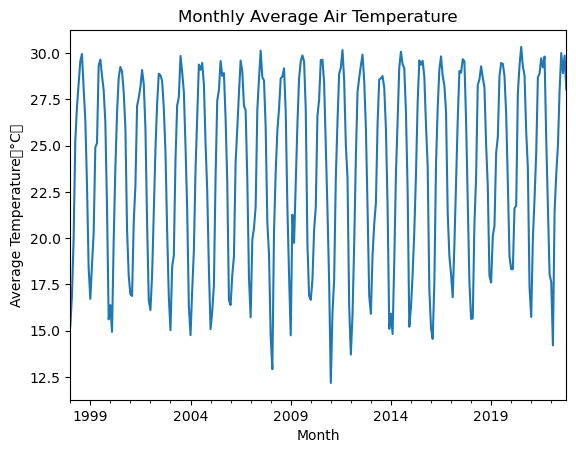

In [8]:
#converts time string to datetime with month periodic
temperature_change['date'] = pd.to_datetime(temperature_change['DATE'])
temperature_change['month'] = temperature_change['date'].dt.to_period('M')
temperature_change.head()
#group by and plot monthly averaged air temperature
monthly_avg_temp = temperature_change.groupby('month')['tmp'].mean()
monthly_avg_temp.plot()
plt.title('Monthly Average Air Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature（°C）') ### Note: 如果要用中文括号，请加上：plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.show()

There is no obvious trend of monthly averaged air temperature change, but it changes regularly on a yearly basis.

# 3. Global collection of hurricanes
3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND).

3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

3.7 [5 points] Plot the number of datapoints per day.

3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

In [25]:
#example
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], ### Note: 不需要跳过索引为2的行，索引为2的行也是数据
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

/var/folders/yx/js3jvr652bx7g_xn_lgjpcy40000gn/T/ipykernel_48599/1261282601.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [424]:
#3.1
grouped = df.groupby('SID')
df.sort_values('WMO_WIND',ascending=False).head(10)['NAME'] ### Note: groupby后的变量grouped没用上呀，而且数据筛选之后不应该还有NaN~

665954    PATRICIA
665952    PATRICIA
665956    PATRICIA
427636       ALLEN
178212         NaN
178210         NaN
178209         NaN
552459       LINDA
605746       WILMA
482074     GILBERT
Name: NAME, dtype: object

In [408]:
print(df['WMO_WIND'].dtype)

object


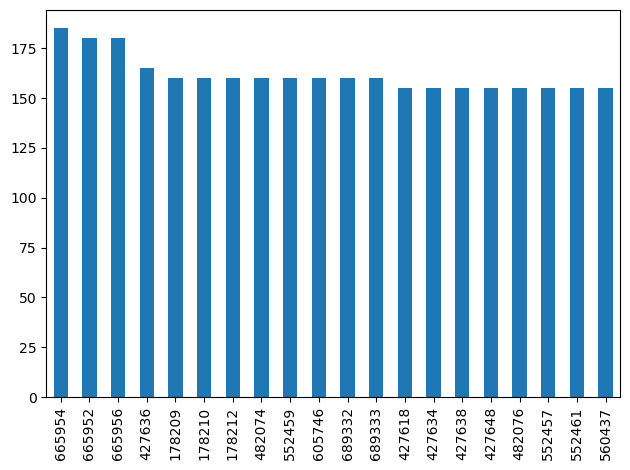

In [426]:
#3.2
#strongest_wind=df.sort_values('WMO_WIND',ascending=False).head(20)
df['WMO_WIND']=pd.to_numeric(df['WMO_WIND'],errors='coerce')
strongest_wind=df['WMO_WIND'].nlargest(20)

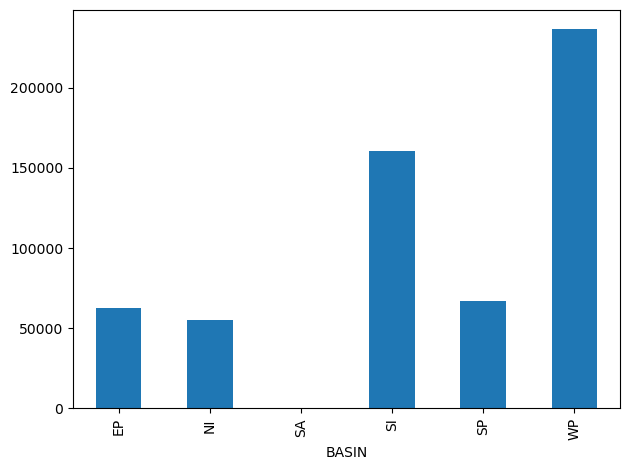

In [28]:
#3.3
(df.groupby(['BASIN']).count())['SID'].plot(kind='bar')
plt.tight_layout()

BASIN
EP     62412
NI     55401
SA       119 (Too little quantity is not shown in the figure！）
SI    160668
SP     67119
WP    236576

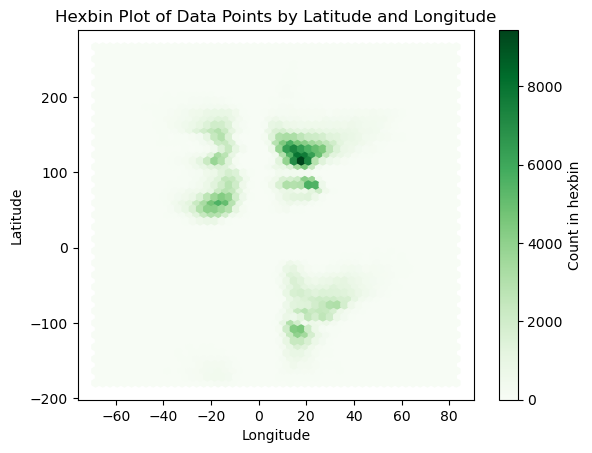

In [29]:
#3.4
hb = plt.hexbin(df['LAT'], df['LON'], gridsize=50, cmap='Greens')
cb = plt.colorbar(hb)
cb.set_label('Count in hexbin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points by Latitude and Longitude')
plt.show()

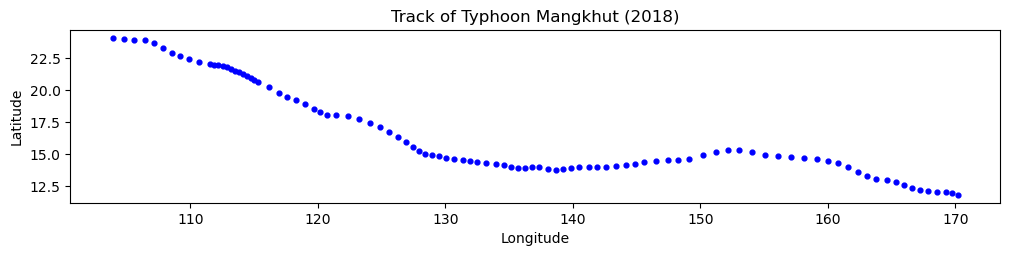

In [30]:
#3.5 
MANGKHUT_2018=df.loc[(df['NAME'].str.contains('MANGKHUT',na=False))&(df['ISO_TIME'].dt.year==2018)]
MANGKHUT_2018
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(MANGKHUT_2018['LON'], MANGKHUT_2018['LAT'], c='blue', s=12, label='Mangkhut Track')
ax.set_aspect('equal')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Track of Typhoon Mangkhut (2018)')
plt.show()

In [89]:
#3.6
filtered_df=df.loc[(df['SEASON']>=1970)&(df['BASIN'].str.contains('EP|WP'))]   
filtered_df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,,,,PROVISIONAL,1974,1952,P_____________


<Axes: xlabel='ISO_TIME'>

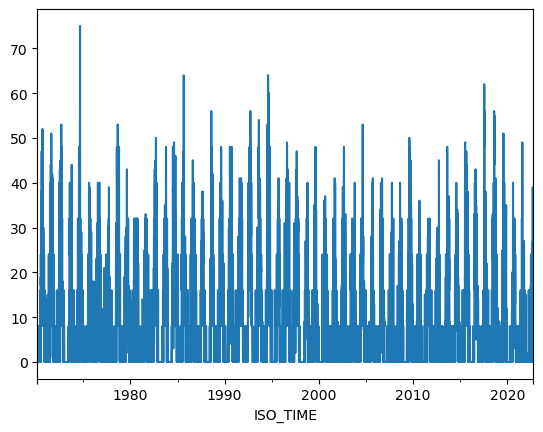

In [122]:
#3.7 per day
datapoint_day= filtered_df.groupby(pd.Grouper(key='ISO_TIME', freq='D')).size()
datapoint_day.plot()

In [123]:
datapoint_day = datapoint_day.reset_index()
datapoint_day.columns=['Date', 'Datapoint_Counts']
datapoint_day

,Date,Datapoint_Counts
0,1970-02-19,8
1,1970-02-20,8
2,1970-02-21,8
3,1970-02-22,8
4,1970-02-23,8
...,...,...
19224,2022-10-08,0
19225,2022-10-09,1
19226,2022-10-10,7
19227,2022-10-11,0


In [220]:
datapoint_day['Day_of_Year']=datapoint_day['Date'].dt.dayofyear
datapoint_day

,Date,Datapoint_Counts,Day_of_Year,anomaly_daily
0,1970-02-19,8,50,7.018868
1,1970-02-20,8,51,7.094340
2,1970-02-21,8,52,7.188679
3,1970-02-22,8,53,7.377358
4,1970-02-23,8,54,7.490566
...,...,...,...,...
19224,2022-10-08,0,281,-17.245283
19225,2022-10-09,1,282,-17.301887
19226,2022-10-10,7,283,-12.396226
19227,2022-10-11,0,284,-18.528302


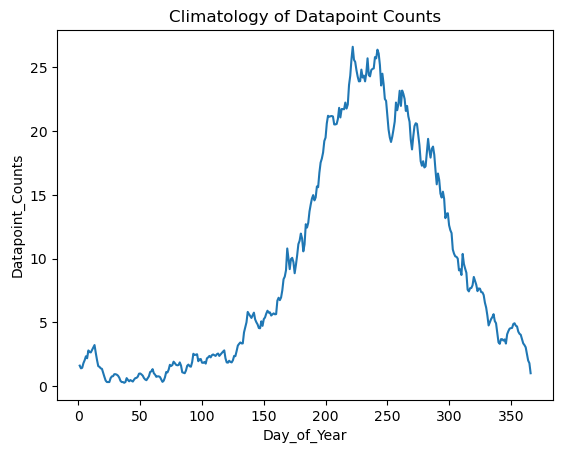

Day_of_Year
1      1.596154
2      1.384615
3      1.423077
4      1.788462
5      2.019231
         ...   
362    3.038462
363    2.538462
364    2.000000
365    1.788462
366    1.000000
Name: Datapoint_Counts, Length: 366, dtype: float64

In [143]:
#3.8
climatology=datapoint_day.groupby(['Day_of_Year']).mean()['Datapoint_Counts']
climatology.plot()
plt.xlabel('Day_of_Year')
plt.ylabel('Datapoint_Counts')
plt.title('Climatology of Datapoint Counts')
plt.show()
climatology

In [194]:
day_count=datapoint_day['Datapoint_Counts'].astype(float)
day_count

0        8.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
19224    0.0
19225    1.0
19226    7.0
19227    0.0
19228    3.0
Name: Datapoint_Counts, Length: 19229, dtype: float64

In [199]:
daily=climatology[datapoint_day['Day_of_Year']]
daily = daily.reset_index()
daily.colomns=['Day_of_Year','Datapoint_Counts']
daily

/var/folders/yx/js3jvr652bx7g_xn_lgjpcy40000gn/T/ipykernel_48599/1205414133.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  daily.colomns=['Day_of_Year','Datapoint_Counts']


,Day_of_Year,Datapoint_Counts
0,50,0.981132
1,51,0.905660
2,52,0.811321
3,53,0.622642
4,54,0.509434
...,...,...
19224,281,17.245283
19225,282,18.301887
19226,283,19.396226
19227,284,18.528302


,Date,Datapoint_Counts,Day_of_Year,anomaly_daily
0,1970-02-19,8,50,7.018868
1,1970-02-20,8,51,7.094340
2,1970-02-21,8,52,7.188679
3,1970-02-22,8,53,7.377358
4,1970-02-23,8,54,7.490566
...,...,...,...,...
19224,2022-10-08,0,281,-17.245283
19225,2022-10-09,1,282,-17.301887
19226,2022-10-10,7,283,-12.396226
19227,2022-10-11,0,284,-18.528302


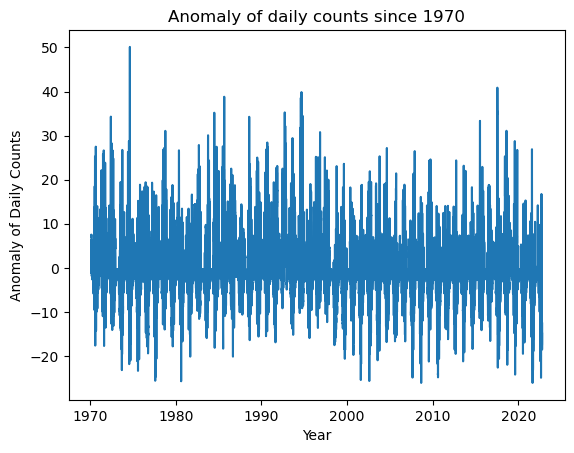

In [240]:
#3.9
datapoint_day['anomaly_daily']=day_count-daily['Datapoint_Counts']
plt.plot(datapoint_day['Date'],datapoint_day['anomaly_daily'])
plt.title('Anomaly of daily counts since 1970')
plt.xlabel('Year')
plt.ylabel('Anomaly of Daily Counts')
datapoint_day

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Text(0.5, 1.0, 'anomaly timeseries at annual resolution')

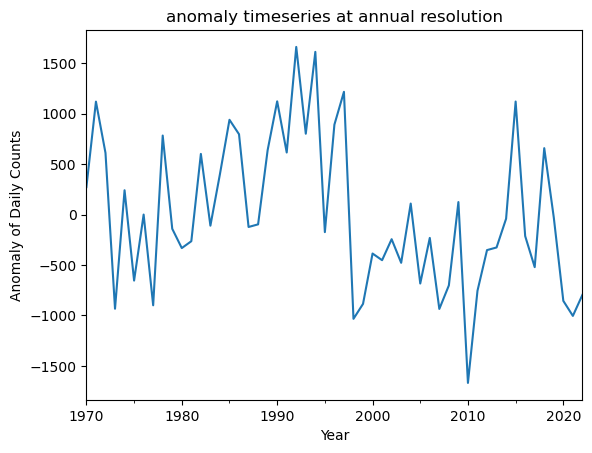

In [245]:
#3.10
datapoint_day_new=datapoint_day[['Date','anomaly_daily']]
datapoint_day_new['Date']
datapoint_day_new.set_index('Date', inplace=True)
print(type(datapoint_day_new.index))
anomaly_annual=datapoint_day_new['anomaly_daily'].resample('A').sum()
anomaly_annual.plot()
plt.xlabel('Year')
plt.ylabel('Anomaly of Daily Counts')
plt.title('anomaly timeseries at annual resolution')

### Note: 图的数量级不对

1917,1990,1992,1994,1997,2010,2015 stand out as having anomalous hurricane activity

# 4. Explore a data set

4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

4.2 [5 points] Plot the time series of a certain variable.

4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

In [6]:
#4.1 load and clean data
air= pd.read_csv("Chengdu People's Park.csv")
print(air.isnull().sum())
filtered_air=air.dropna()
print(filtered_air.isnull().sum())

Time       0
PM2_5     29
CO        31
PM10     110
SO2       31
O3        35
NO2       33
dtype: int64
Time     0
PM2_5    0
CO       0
PM10     0
SO2      0
O3       0
NO2      0
dtype: int64


Data resources from：China Meteorological Data website

/var/folders/yx/js3jvr652bx7g_xn_lgjpcy40000gn/T/ipykernel_36146/2202449452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_air['Time'] = pd.to_datetime(filtered_air['Time'])


<Axes: xlabel='Time'>

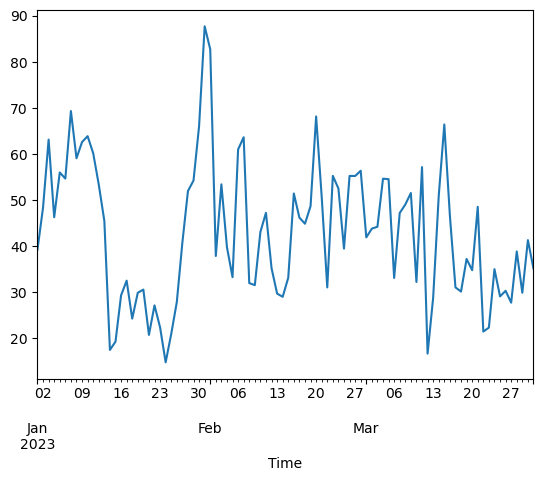

In [7]:
#4.2 time series of NO2
filtered_air['Time'] = pd.to_datetime(filtered_air['Time'])
NO2=filtered_air.groupby(pd.Grouper(key='Time', freq='D')).mean()['NO2']
NO2.plot()

In [9]:
#4.3 statistical checks
from scipy import stats

<Axes: xlabel='CO'>

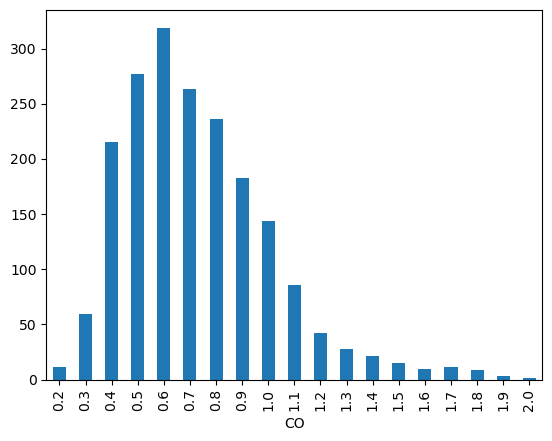

In [21]:
#check the CO value
CO=(filtered_air.groupby(['CO'])).count()['Time']
CO.plot(kind='bar')

In [27]:
#Normality Test for CO value
stat, p_value = stats.shapiro(filtered_air['CO'])
print("p-value:", p_value)

p-value: 1.8113189066396898e-29


p<0.05 fit the normal distribution

In [28]:
#Independent samples t-test for PM2.5 and PM10
t_stat, p_value = stats.ttest_ind(filtered_air['PM2_5'],filtered_air['PM10'])
print("p-value:", p_value)

p-value: 4.652913931253025e-68


In [31]:
#Paired samples t-test for PM2.5 and PM10
t_stat, p_value = stats.ttest_rel(filtered_air['PM2_5'],filtered_air['PM10'])
print("p-value:", p_value)

p-value: 0.0


In [33]:
#Pearson's correlation for PM2.5 and PM10
correlation, p_value = stats.pearsonr(filtered_air['PM2_5'],filtered_air['PM10'])
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: 0.8953445747838471
p-value: 0.0


PM2_5 and PM10 has linear correlation